In [164]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [165]:
NFW = pd.read_csv('NFWBS_PUF_2016_data.csv')
NFW

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,7,7,7,59,3,4,2,...,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,5,6,6,59,3,4,3,...,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,5,5,5,46,2,2,3,...,1,4,9,0,0,0,0,2,0,1.224941


In [166]:
NFW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


In [167]:
NFW.isna()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [168]:
NFW.columns

Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

In [169]:
Df1 = NFW[['FINKNOWL1','FINKNOWL2','FINKNOWL3',]]


In [170]:
Df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   FINKNOWL1  6394 non-null   int64
 1   FINKNOWL2  6394 non-null   int64
 2   FINKNOWL3  6394 non-null   int64
dtypes: int64(3)
memory usage: 150.0 KB


In [171]:
Df1.corr()

,FINKNOWL1,FINKNOWL2,FINKNOWL3
FINKNOWL1,1.000000,0.012956,0.050876
FINKNOWL2,0.012956,1.000000,0.385775
FINKNOWL3,0.050876,0.385775,1.000000


In [172]:
Df2 = NFW[['FWBscore','FSscore']]

##FWBscore Financial well-being scale score
##FSscore Financial skill scale score

In [173]:
Df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FWBscore  6394 non-null   int64
 1   FSscore   6394 non-null   int64
dtypes: int64(2)
memory usage: 100.0 KB


In [174]:
Df2.corr()

,FWBscore,FSscore
FWBscore,1.000000,0.494661
FSscore,0.494661,1.000000


In [192]:
Df3 = NFW[['FS1_1','FS1_2','FS1_3','FS1_4','FS1_5','FS1_6','FS1_7','FS2_1','FS2_2','FS2_3','FSscore']]



In [193]:
Df3 = Df3[Df3.FS1_1 != -1]
Df3 = Df3[Df3.FS1_2 != -1]
Df3 = Df3[Df3.FS1_3 != -1]
Df3 = Df3[Df3.FS1_4 != -1]
Df3 = Df3[Df3.FS1_5 != -1]
Df3 = Df3[Df3.FS1_6 != -1]
Df3 = Df3[Df3.FS1_7 != -1]

In [194]:
Df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6393
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   FS1_1    6378 non-null   int64
 1   FS1_2    6378 non-null   int64
 2   FS1_3    6378 non-null   int64
 3   FS1_4    6378 non-null   int64
 4   FS1_5    6378 non-null   int64
 5   FS1_6    6378 non-null   int64
 6   FS1_7    6378 non-null   int64
 7   FS2_1    6378 non-null   int64
 8   FS2_2    6378 non-null   int64
 9   FS2_3    6378 non-null   int64
 10  FSscore  6378 non-null   int64
dtypes: int64(11)
memory usage: 597.9 KB


In [195]:
Df3.corr()

,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,FSscore
FS1_1,1.000000,0.554295,0.606517,0.641220,0.545887,0.651859,0.695586,0.352287,0.339135,-0.340804,0.862186
FS1_2,0.554295,1.000000,0.531832,0.569267,0.550098,0.466024,0.510091,0.329671,0.417286,-0.294594,0.699186
FS1_3,0.606517,0.531832,1.000000,0.710591,0.667831,0.467993,0.510870,0.280188,0.264113,-0.442828,0.759324
FS1_4,0.641220,0.569267,0.710591,1.000000,0.666981,0.524528,0.568572,0.318747,0.301545,-0.399534,0.827024
FS1_5,0.545887,0.550098,0.667831,0.666981,1.000000,0.430233,0.486611,0.289230,0.280185,-0.403203,0.731558
FS1_6,0.651859,0.466024,0.467993,0.524528,0.430233,1.000000,0.696231,0.354228,0.304659,-0.239521,0.726069
FS1_7,0.695586,0.510091,0.510870,0.568572,0.486611,0.696231,1.000000,0.328758,0.321252,-0.256668,0.777596
FS2_1,0.352287,0.329671,0.280188,0.318747,0.289230,0.354228,0.328758,1.000000,0.581932,-0.078073,0.521510
FS2_2,0.339135,0.417286,0.264113,0.301545,0.280185,0.304659,0.321252,0.581932,1.000000,0.000959,0.507502
FS2_3,-0.340804,-0.294594,-0.442828,-0.399534,-0.403203,-0.239521,-0.256668,-0.078073,0.000959,1.000000,-0.442859


In [223]:
from sklearn.model_selection import train_test_split
Df3_train, Df3_test = train_test_split(Df3, test_size =0.33, random_state = 1)
print(Df3_test.shape)
print(Df3_train.shape)

(2105, 39)
(4273, 39)


In [224]:
crime_train, crime_test = train_test_split(Df3, test_size = .2)

In [225]:
x = Df3_train[['FS1_1','FS1_2','FS1_3','FS1_4','FS1_5','FS1_6','FS1_7','FS2_1','FS2_2','FS2_3']]

x_test = Df3_test[['FS1_1','FS1_2','FS1_3','FS1_4','FS1_5','FS1_6','FS1_7','FS2_1','FS2_2','FS2_3']]

KeyError: "['FS1_1', 'FS1_2', 'FS1_3', 'FS1_4', 'FS1_5', 'FS1_6', 'FS1_7'] not in index"

In [ ]:
y = Df3_train['FSscore']
y_test = Df3_test['FSscore']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB() # default params - MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb_model.fit(x, y)

MultinomialNB()

In [ ]:
print(nb_model.score(x,y))

0.09512858038887727


In [ ]:
print(nb_model.score(x_test,y_test))

0.10094043887147336


In [ ]:
y_predicted = nb_model.predict(x_test)
ypred = pd.crosstab(y_test, y_predicted, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1) 
ypred.loc['Total'] = ypred.sum()
ypred

Predicted,18,38,42,43,50,51,55,56,57,58,70,85,Total
Actual,,,,,,,,,,,,,
8,0,0,1,0,0,0,0,0,0,0,0,0,1
10,0,0,2,0,0,0,0,0,0,0,0,0,2
14,1,0,2,0,0,0,0,0,0,0,0,0,3
16,0,0,2,0,0,0,0,0,0,0,0,0,2
20,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,0,0,0,0,0,2,0,0,0,3,5
81,0,0,0,0,0,0,0,4,0,0,0,1,5
82,0,0,0,0,0,0,0,0,0,16,0,0,16


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')


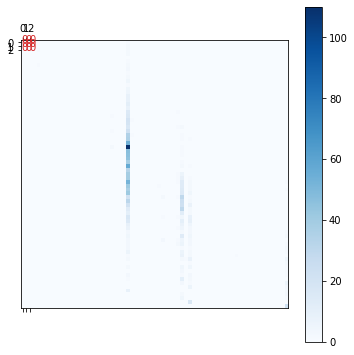

In [ ]:
plot_confusion_matrix(y_test, nb_model.predict(x_test))

In [ ]:
x = Df3_train[['FS1_1','FS1_2','FS1_3','FS1_4','FS1_5','FS1_6','FS1_7','FS2_1','FS2_2','FS2_3']]

In [ ]:
y = Df3_test[['FSscore']]

In [226]:
Df3_train.shape

(4273, 39)

Df3 = pd.get_dummies(Df3, columns=['FS1_1','FS1_2','FS1_3','FS1_4','FS1_5','FS1_6','FS1_7','FS2_1','FS2_2','FS2_3'], prefix = ['dummy','dummy','dummy','dummy','dummy','dummy','dummy'])

In [227]:
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(x,y)
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5).fit(x,y)

ValueError: Number of labels=1595 does not match number of samples=4783

rf01 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(x,y)

In [ ]:
Df4 = NFW[['FWB1_1','FWB1_2','FWB1_3','FWB1_4','FWB1_5','FWB1_6','FWB2_1','FWB2_2','FWB2_3','FWB2_4']]

In [ ]:
Df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   FWB1_1  6394 non-null   int64
 1   FWB1_2  6394 non-null   int64
 2   FWB1_3  6394 non-null   int64
 3   FWB1_4  6394 non-null   int64
 4   FWB1_5  6394 non-null   int64
 5   FWB1_6  6394 non-null   int64
 6   FWB2_1  6394 non-null   int64
 7   FWB2_2  6394 non-null   int64
 8   FWB2_3  6394 non-null   int64
 9   FWB2_4  6394 non-null   int64
dtypes: int64(10)
memory usage: 499.7 KB


In [ ]:
Df4.corr()

,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
FWB1_1,1.000000,0.681299,-0.479241,0.685262,-0.415907,-0.438652,-0.568399,0.652636,-0.483152,-0.448357
FWB1_2,0.681299,1.000000,-0.478957,0.704254,-0.355591,-0.445923,-0.506654,0.602533,-0.434183,-0.408943
FWB1_3,-0.479241,-0.478957,1.000000,-0.486202,0.526928,0.618277,0.602198,-0.496614,0.516719,0.552391
FWB1_4,0.685262,0.704254,-0.486202,1.000000,-0.351658,-0.434148,-0.503711,0.621428,-0.462599,-0.426669
FWB1_5,-0.415907,-0.355591,0.526928,-0.351658,1.000000,0.471662,0.500905,-0.414976,0.434705,0.441083
FWB1_6,-0.438652,-0.445923,0.618277,-0.434148,0.471662,1.000000,0.519631,-0.446753,0.436324,0.512801
FWB2_1,-0.568399,-0.506654,0.602198,-0.503711,0.500905,0.519631,1.000000,-0.603919,0.640245,0.613980
FWB2_2,0.652636,0.602533,-0.496614,0.621428,-0.414976,-0.446753,-0.603919,1.000000,-0.529989,-0.463425
FWB2_3,-0.483152,-0.434183,0.516719,-0.462599,0.434705,0.436324,0.640245,-0.529989,1.000000,0.550552
FWB2_4,-0.448357,-0.408943,0.552391,-0.426669,0.441083,0.512801,0.613980,-0.463425,0.550552,1.000000


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

#Multiple Linear regression:
# Target Var
X_col = ["KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", "KH6correct", "KH7correct", "KH8correct", "KH9correct"]

lin_X= NFW[X_col]
lin_Y= NFW.FWBscore
print(lin_X)
print(lin_Y)

lin_x_train, lin_x_test, lin_y_train, lin_y_test = train_test_split(lin_X, lin_Y, test_size=0.3, random_state =101)

print(lin_x_train.shape)
print(lin_x_test.shape)
print(lin_y_train.shape)
print(lin_y_test.shape)

model = LinearRegression()

model.fit(lin_x_train, lin_y_train)

predictions = model.predict(lin_x_test)

print('mean_squared_error : ', mean_squared_error(lin_y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(lin_y_test, predictions))

# TEST
y_prediction = model.predict(lin_x_test)
score=r2_score(lin_y_test,y_prediction)
print("r2 socre is" ,score)

      KH1correct  KH2correct  KH3correct  KH4correct  KH5correct  KH6correct  \
0              1           1           1           1           1           1   
1              0           1           0           1           1           1   
2              1           1           0           1           0           1   
3              0           0           0           1           0           1   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
6389           1           1           1           1           1           1   
6390           0           0           0           1           1           1   
6391           0           1           1           0           0           1   
6392           0           1           0           1           0           1   
6393           0           0           0           1           1           1   

      KH7correct  KH8correct  KH9correc